In [1]:
from qiskit.transpiler import PassManager, InstructionDurations

In [2]:
import os
os.getcwd()
os.chdir('/home/siyuan/Seafile/Thesis/PycharmProjects/DD_PE_paper/')

In [3]:
from qiskit import IBMQ, transpile, Aer
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-france', group='univ-montpellier', project='default')
backend = provider.get_backend('ibmq_guadalupe')

In [4]:
from src.tools.DD_insertion import construct_bv_circuit, \
                                 construct_graph_matrix, \
                                 convert_count_to_prob, \
                                 translate_circuit_to_basis

In [5]:
from qiskit.circuit.library import QFT, GraphState

In [6]:
bv_circuits = []
hs_circuits = []
qft_circuits = []
for i in range(3, 15):
    bv_circuits.append(construct_bv_circuit(i))

# for i in range(2, 15, 2):
#     hs_circuits.append(construct_hs_circuit(i))

for i in range(3, 15):
    qft_circuits.append(QFT(i))

for circuit in bv_circuits:
    circuit.measure_all()

# for circuit in hs_circuits:
#     circuit.measure_all()

for circuit in qft_circuits:
    circuit.measure_all()

In [7]:
durations = InstructionDurations.from_backend(backend)
## add duration of y gates which are used for DD sequences
bconf = backend.configuration()
for i in range(bconf.num_qubits):
    x_duration = durations.get('x', i)
    durations.update(InstructionDurations(
        [('y', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('rx', i, x_duration)]
        ))

    durations.update(InstructionDurations(
        [('ry', i, x_duration)]
        ))

In [8]:
graph_state_circuits = []
coupling_map = backend.configuration().coupling_map

for i in range(3, 15):
    gs_circuit_matrix = construct_graph_matrix(i, coupling_map)
    graph_state_circuits.append(GraphState(gs_circuit_matrix))

for circuit in graph_state_circuits:
    circuit.measure_all()

In [9]:
from src.tools.DD_insertion import pm_DD_sequences
pms = pm_DD_sequences(durations)


In [10]:
bv_job_ids = []
bv_jobs = []

for circuit in bv_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    bv_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    bv_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d5f0f33cdbd0642e0698
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: False
6295d5f24ad655495d9e4aa5
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d5f4bc0d0223f9dbecf5
if applied DD for None: False
if applied DD fo

In [11]:
for job_id in bv_job_ids:
    print(job_id)

6295d5f0f33cdbd0642e0698
6295d5f24ad655495d9e4aa5
6295d5f4bc0d0223f9dbecf5
6295d5fa9baeab694e4acd6e
6295d5fc9baeab7fa94acd6f
6295d5ff3bb4af70ddb95504
6295d602bc0d025407dbecf6
6295d6049baeab12644acd70
6295d607bc0d026927dbecf7
6295d60a16cdc45025f25e42
6295d60d3bb4af2e86b95505
6295d610f33cdb32332e069a


In [17]:
from qiskit import execute

shots = 8192
psts = []
bv_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',

]
for i, circuit in enumerate(bv_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    ideal_result = list(ideal_counts.keys())[0]
    result_counts = backend.retrieve_job(bv_job_ids[i]).result().get_counts()
    pst = []
    for result_count in result_counts:
        obtain_results = result_count.get(ideal_result, 0)
        pst.append(obtain_results/shots)
    psts.append(pst)

bv_circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12', 'BV13', 'BV14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']
bv_results_data = {}

for i, name in enumerate(bv_circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, pst in enumerate(psts[i]):
        print(f'pst result of {DD_sequences[j]}: {pst}')
    bv_results_data[name] = psts[i]

---------Result of circuit BV3 -------------
pst result of no_dd: 0.4410400390625
pst result of hahn_X: 0.4327392578125
pst result of hahn_Y: 0.4376220703125
pst result of CP: 0.434814453125
pst result of CPMG: 0.4449462890625
pst result of xy4: 0.44677734375
pst result of xy8: 0.4466552734375
pst result of xy16: 0.4501953125
pst result of udd1: 0.4473876953125
pst result of udd2: 0.43896484375
pst result of kdd: 0.4412841796875
---------Result of circuit BV4 -------------
pst result of no_dd: 0.424560546875
pst result of hahn_X: 0.417724609375
pst result of hahn_Y: 0.4259033203125
pst result of CP: 0.423583984375
pst result of CPMG: 0.41796875
pst result of xy4: 0.417236328125
pst result of xy8: 0.4244384765625
pst result of xy16: 0.4232177734375
pst result of udd1: 0.4169921875
pst result of udd2: 0.4140625
pst result of kdd: 0.4281005859375
---------Result of circuit BV5 -------------
pst result of no_dd: 0.193115234375
pst result of hahn_X: 0.1961669921875
pst result of hahn_Y: 0.1

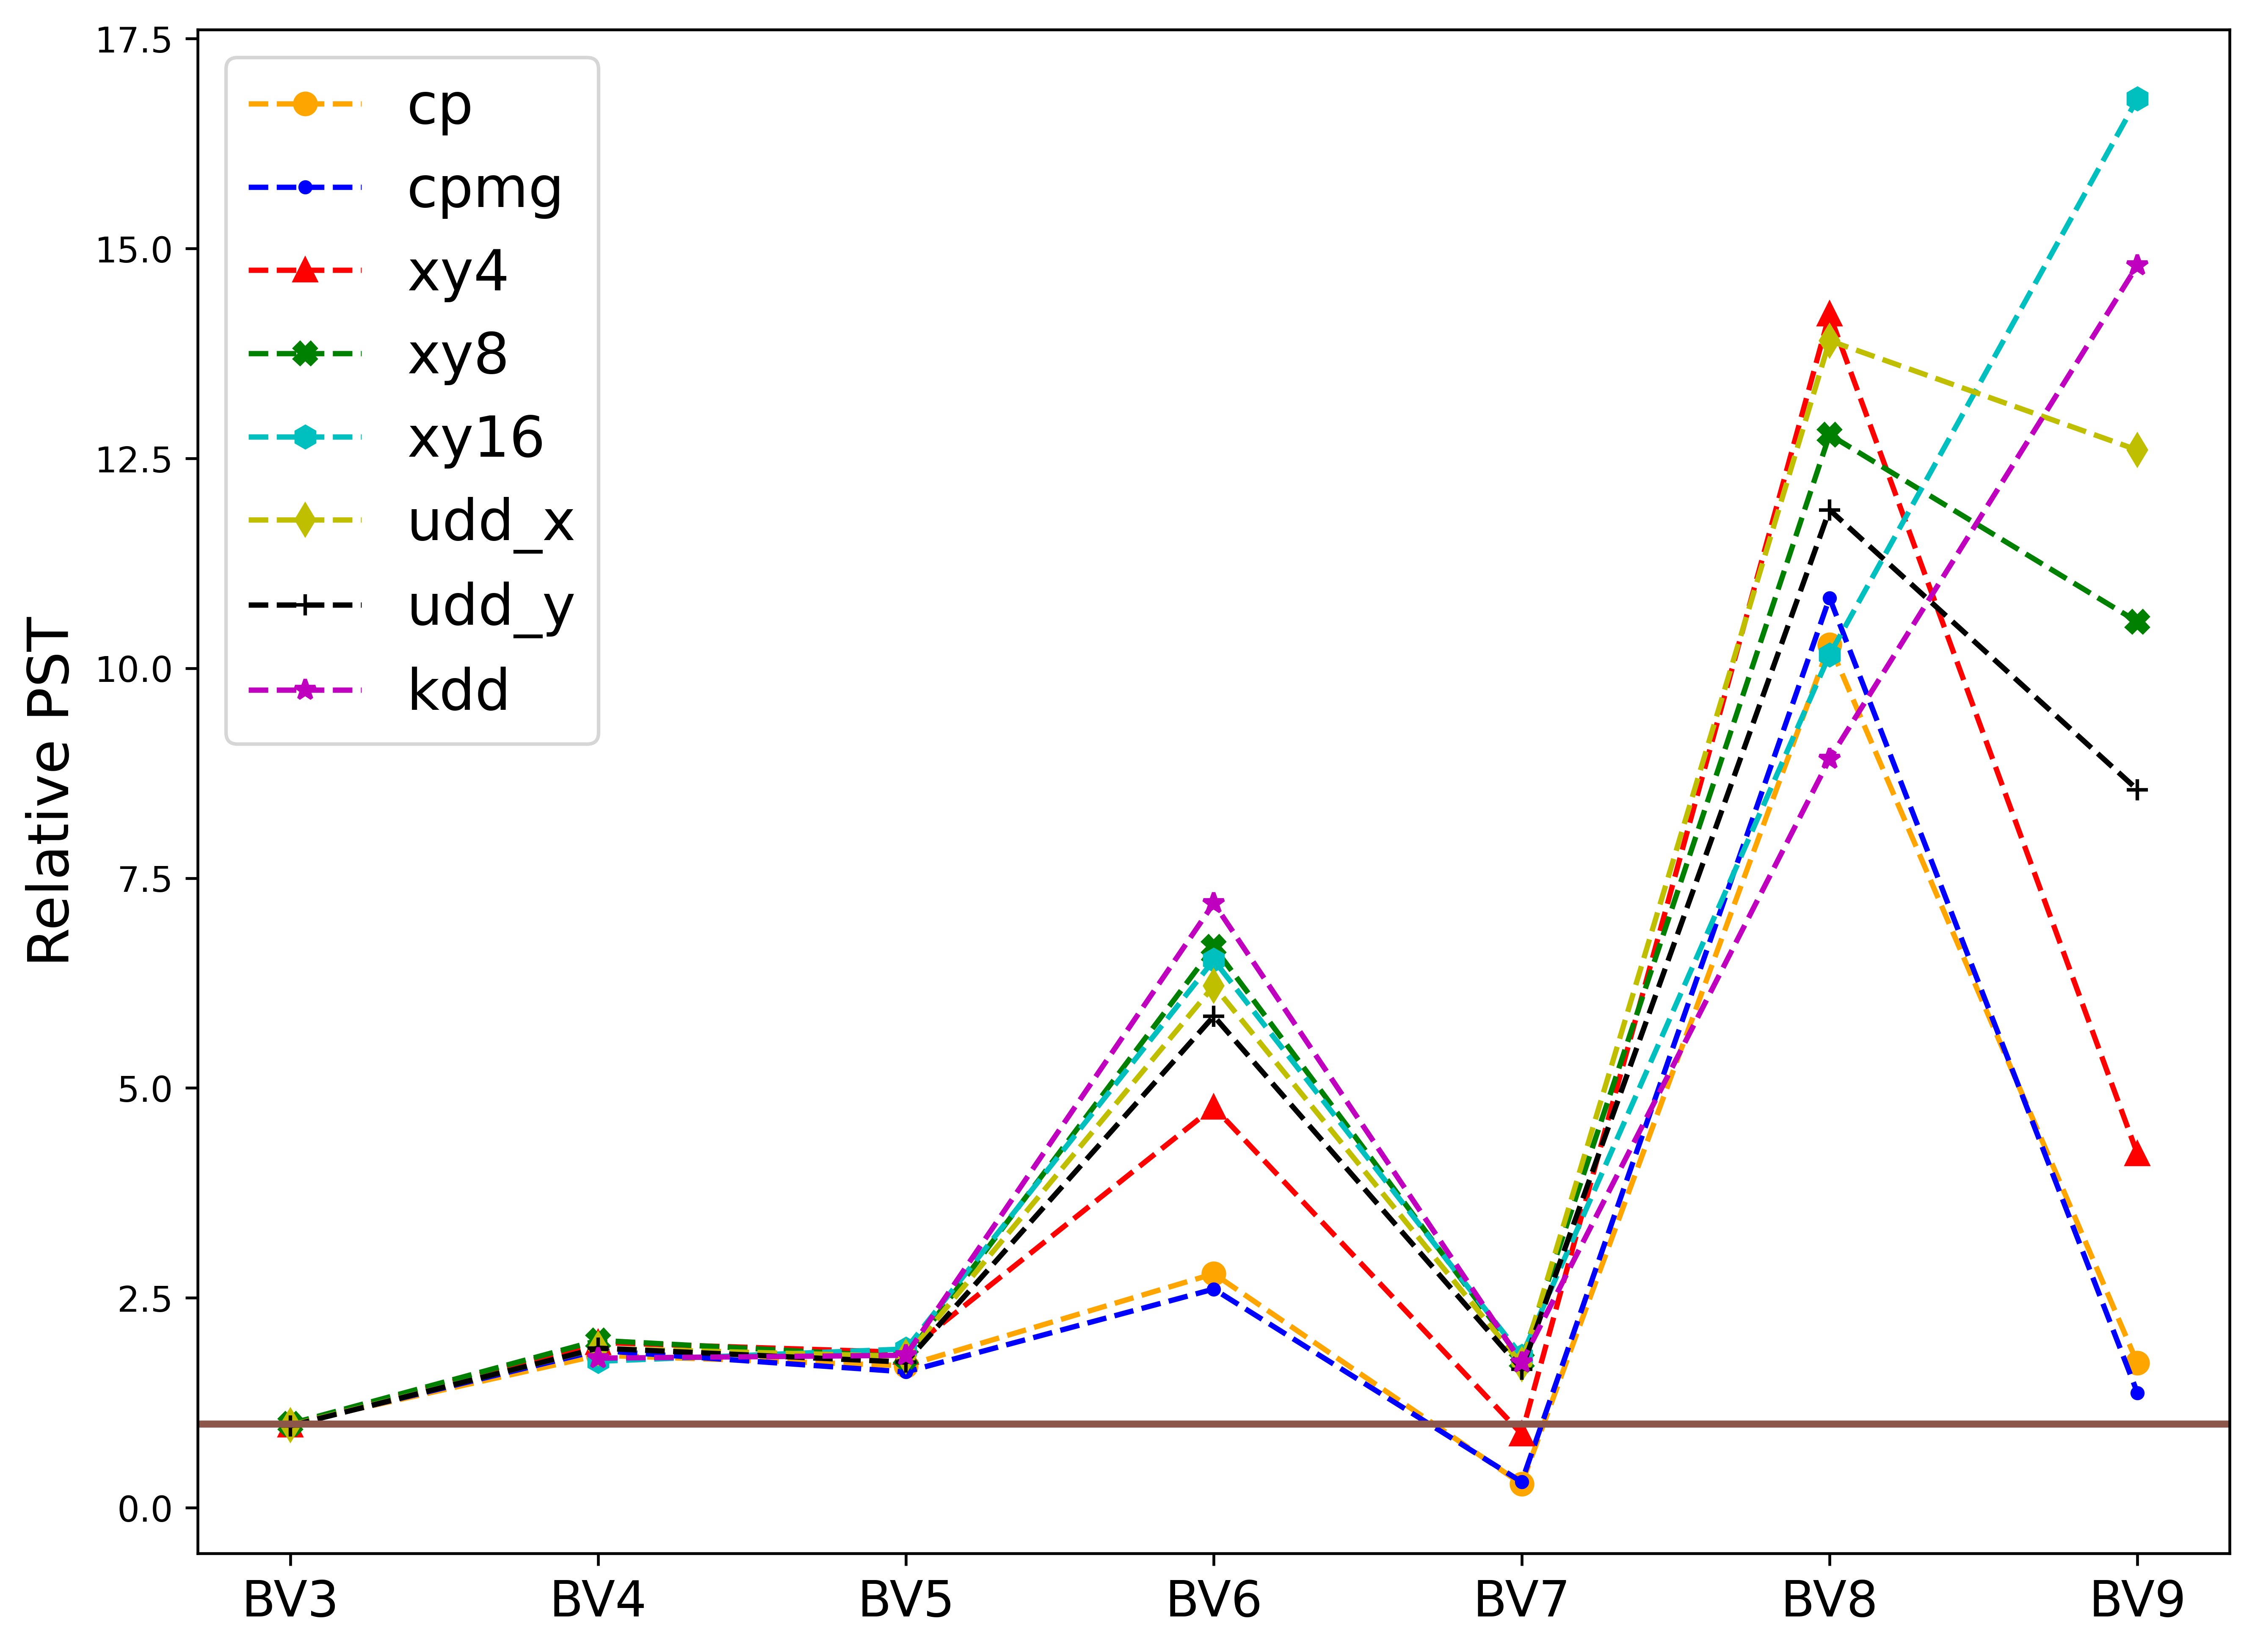

In [18]:
import numpy as np
import matplotlib.pyplot as plt

baseline = []
data = []
for name in bv_circuit_names:
    result_data = bv_results_data[name]
    baseline.append(result_data[0])
    ratio = [i/result_data[0] for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[1:, 2]
cpmg = data[1:, 3]
xy4 = data[1:, 4]
xy8 = data[1:, 5]
xy16 = list(data[2:, 6])
xy16.insert(0, None)
udd_X = data[1:, 7]
udd_Y = data[1:, 8]
kdd = list(data[2:, 9])
kdd.insert(0, None)

circuit_names = ['BV3', 'BV4', 'BV5', 'BV6', 'BV7', 'BV8', 'BV9', 'BV10', 'BV11', 'BV12',]

x_ticks = circuit_names[:7]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2][:7], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2][:7], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2][:7], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2][:7], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2][:7], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2][:7], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2][:7], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2][:7], linestyle='--', marker='*', color='m', label='kdd')

plt.axhline(1, color='tab:brown', lw=2)

plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative PST result for BV circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative PST', fontsize=16)
plt.savefig('TQE_Relat_PST_BV_guadalupe_0530.pdf', bbox_inches='tight', pad_inches=0)

In [12]:
gs_job_ids = []
gs_jobs = []

for circuit in graph_state_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    gs_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    gs_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d612f33cdb0e132e069b
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6139baeabc6774acd71
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6151ea57f4d5bebd621
if applied DD for None: False
if applied DD for N

In [13]:
for job_id in gs_job_ids:
    print(job_id)

6295d612f33cdb0e132e069b
6295d6139baeabc6774acd71
6295d6151ea57f4d5bebd621
6295d616f33cdbcb832e069c
6295d61f0212ff6c38251f16
6295d6213bb4af429cb95506
6295d6234bb9753b99efb4cb
6295d6251ea57f7ef2ebd622
6295d62af33cdbd9cd2e069d
6295d63516cdc44100f25e43
6295d6373bb4af4e53b95507
6295d6384bb97533b6efb4cc


In [19]:
from scipy.spatial.distance import jensenshannon
from qiskit import execute
gs_jsds = []

gs_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
]


shots = 8192

for i, circuit in enumerate(graph_state_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(gs_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    gs_jsds.append(jsd)

circuit_names = ['GS3', 'GS4', 'GS5', 'GS6', 'GS7', 'GS8', 'GS9', 'GS10', 'GS11', 'GS12', 'GS13', 'GS14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

gs_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(gs_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    gs_results_data[name] = gs_jsds[i]

---------Result of circuit GS3 -------------
jsd result of no_dd: 0.037386483764624084
jsd result of hahn_X: 0.03929041790260473
jsd result of hahn_Y: 0.0398840241355863
jsd result of CP: 0.0313798794481179
jsd result of CPMG: 0.02911298060997765
jsd result of xy4: 0.02446665984227423
jsd result of xy8: 0.034020733543740383
jsd result of xy16: 0.04626685871515219
jsd result of udd1: 0.04443676255348533
jsd result of udd2: 0.0631593539061717
jsd result of kdd: 0.03906807976515752
---------Result of circuit GS4 -------------
jsd result of no_dd: 0.03624101097869537
jsd result of hahn_X: 0.040740486278102554
jsd result of hahn_Y: 0.0419866778433813
jsd result of CP: 0.037711183135690364
jsd result of CPMG: 0.051368424444193754
jsd result of xy4: 0.051991813215714056
jsd result of xy8: 0.03321859057439935
jsd result of xy16: 0.04475497024129768
jsd result of udd1: 0.044081038452795054
jsd result of udd2: 0.054646711127368325
jsd result of kdd: 0.05210388034022584
---------Result of circuit

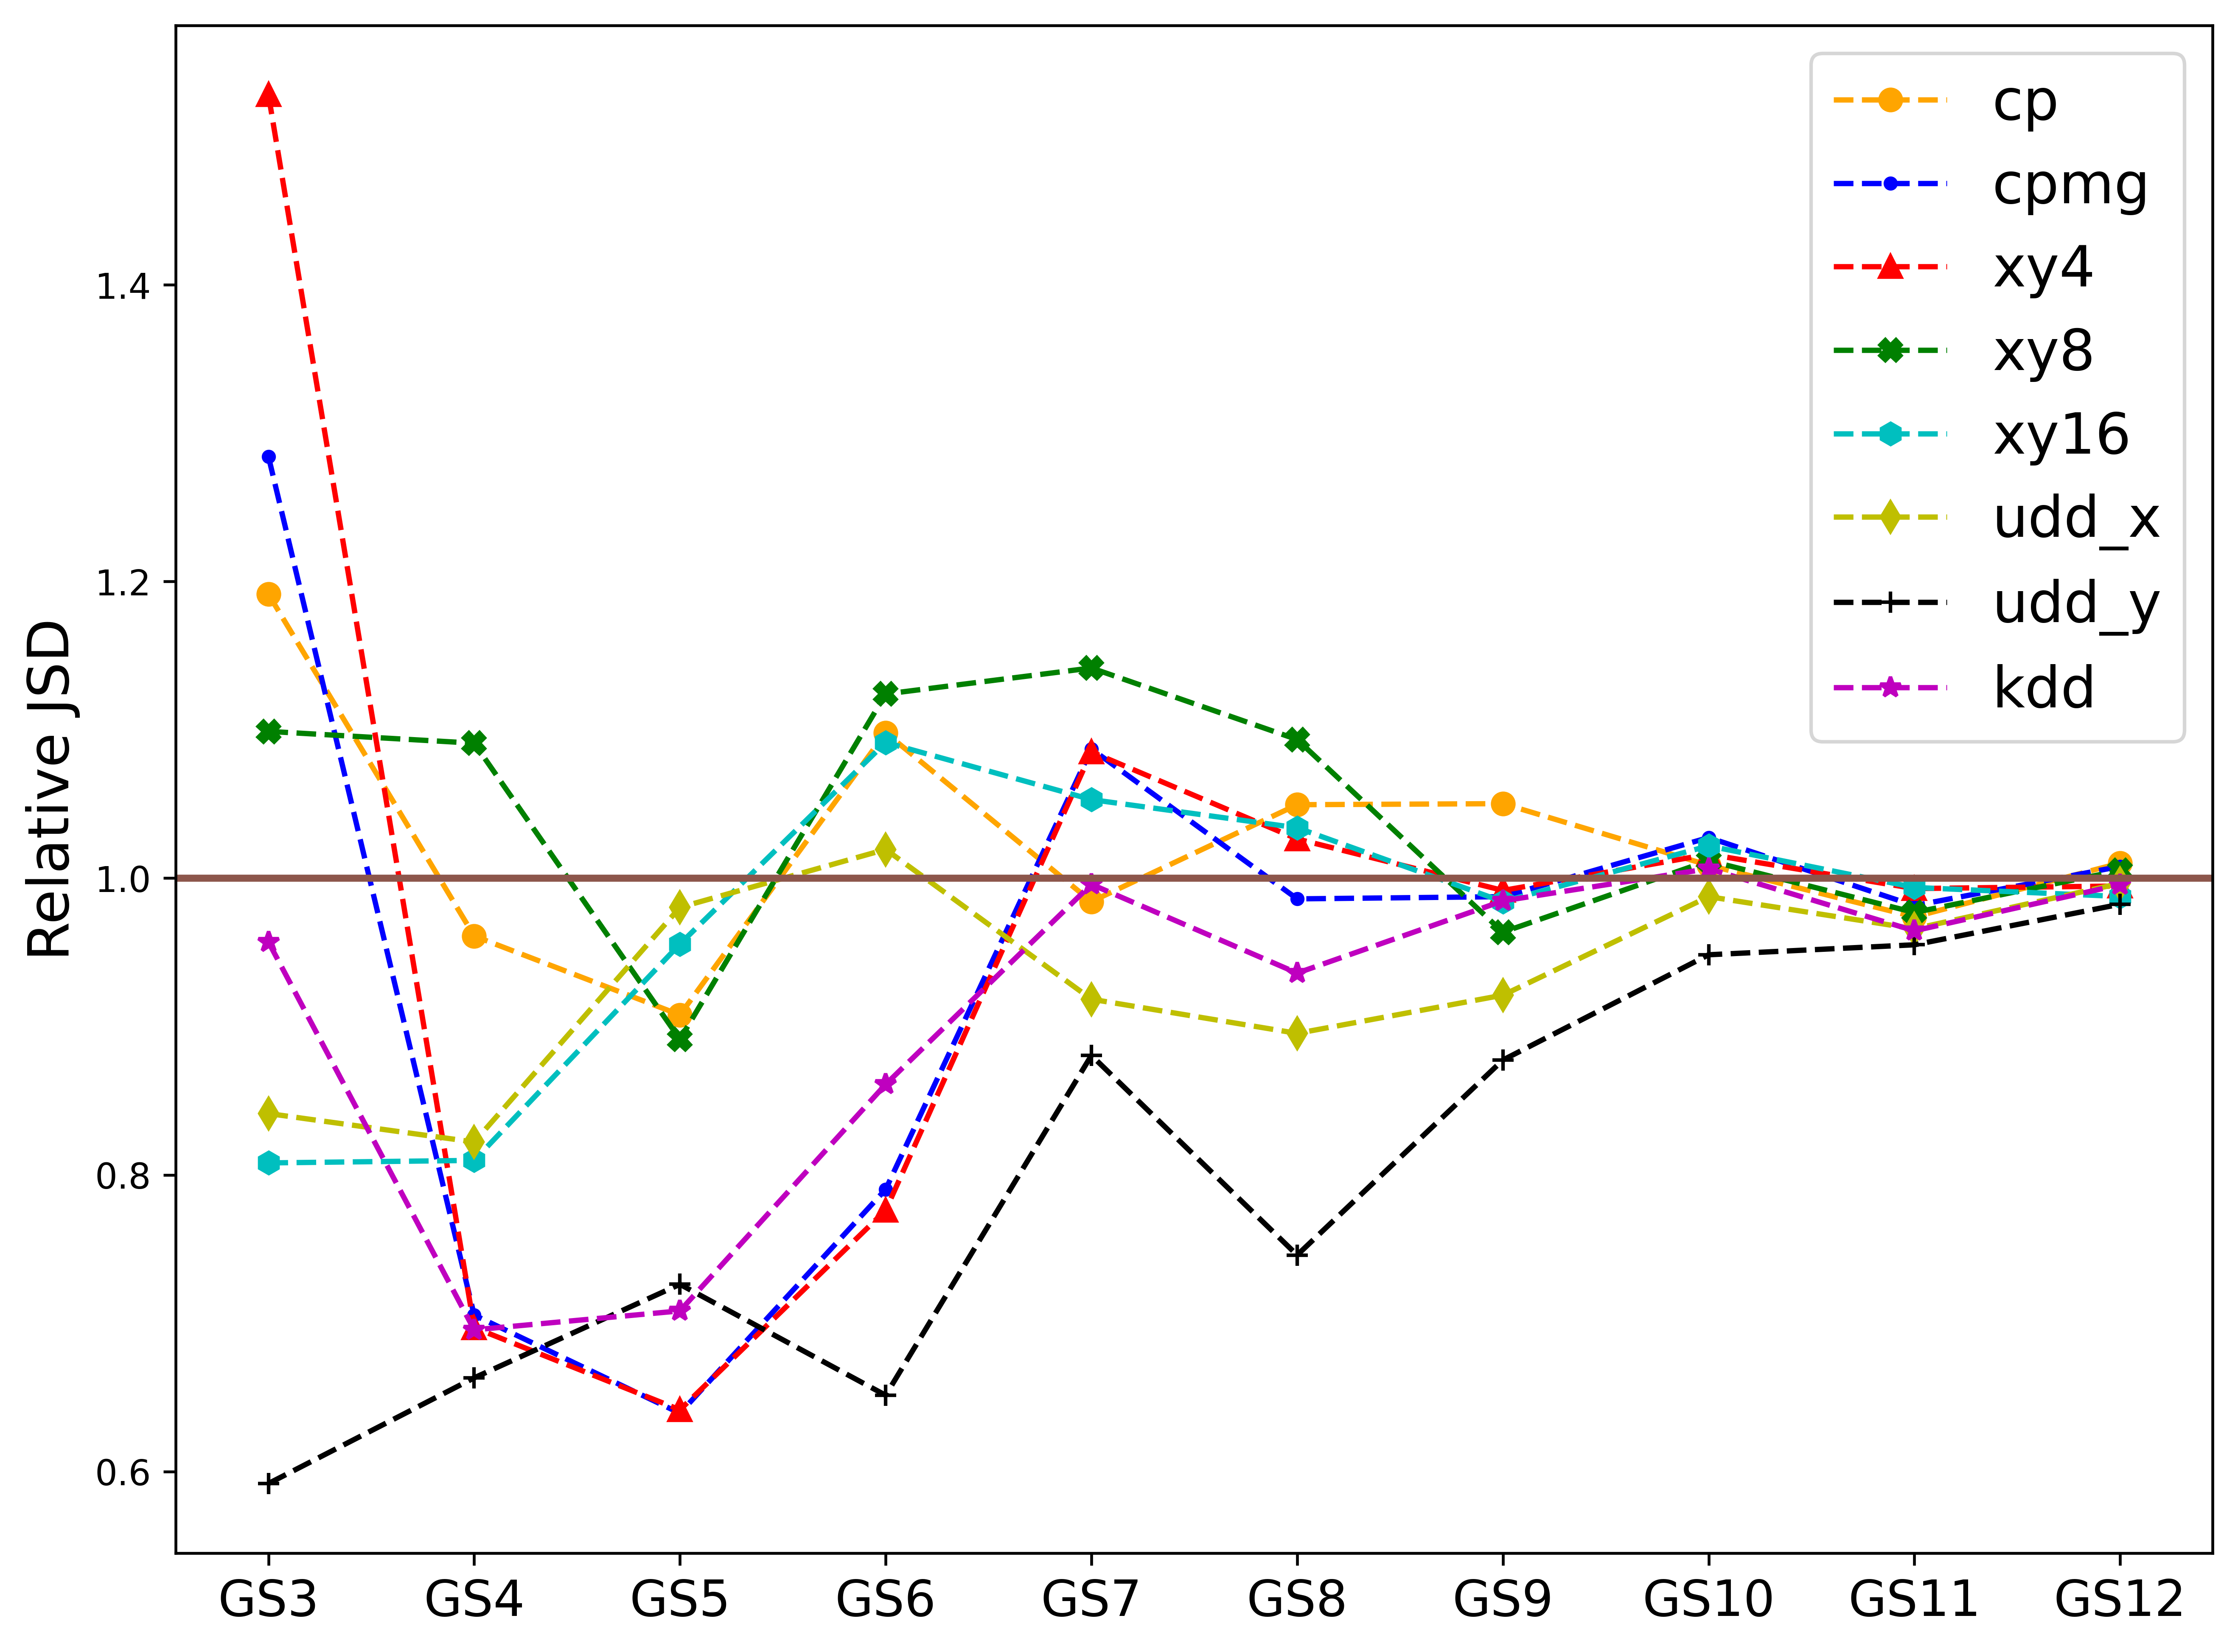

In [20]:
baseline = []

data = []
for name in circuit_names:
    result_data = gs_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names[:-2]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)
plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for GS circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_GS_guadalupe_T_0530.pdf', bbox_inches='tight', pad_inches=0)

In [14]:
qft_job_ids = []
qft_jobs = []

for circuit in qft_circuits:
    circuit_list = []
    transpiled_qc = transpile(circuit, backend=backend, optimization_level=3, seed_transpiler=1)
    circuit_list.append(transpiled_qc)
    for pm in pms:
        qc_transpile = pm.run(transpiled_qc)
        qc_transpile_base = translate_circuit_to_basis(qc_transpile, bconf)
        circuit_list.append(qc_transpile_base)
    job = backend.run(circuit_list, shots=8192)
    qft_jobs.append(job)
    job_id = job.job_id()
    print(job_id)
    qft_job_ids.append(job_id)

if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d63b0212ffd087251f17
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d63d16cdc45777f25e44
if applied DD for None: False
if applied DD for None: False
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
if applied DD for None: True
6295d6403bb4af6444b95508
if applied DD for None: False
if applied DD for N

In [15]:
for job_id in qft_job_ids:
    print(job_id)

6295d63b0212ffd087251f17
6295d63d16cdc45777f25e44
6295d6403bb4af6444b95508
6295d6444bb975cd6befb4cd
6295d6481ea57f67eaebd623
6295d64d9baeab67524acd74
6295d652bc0d023529dbecfa
6295d65a0212ff7c08251f19
6295d6629baeab28ff4acd76
6295d66bf33cdb6d7b2e06a1
6295d67616cdc45815f25e46
6295d6880212ff79d2251f1b


In [21]:
from scipy.spatial.distance import jensenshannon
qft_jsds = []

qft_job_ids = [
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    '',
    ''
]

shots = 8192

for i, circuit in enumerate(qft_circuits):
    ideal_counts = execute(circuit, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
    result_counts = backend.retrieve_job(qft_job_ids[i]).result().get_counts()
    jsd = []
    for result_count in result_counts:
        p_ideal, p_result = convert_count_to_prob(result_count, ideal_counts, shots=shots)
        jsd.append(jensenshannon(p_ideal, p_result))
    qft_jsds.append(jsd)

circuit_names = ['QFT3', 'QFT4', 'QFT5', 'QFT6', 'QFT7', 'QFT8', 'QFT9', 'QFT10', 'QFT11', 'QFT12', 'QFT13', 'QFT14']
DD_sequences = ['no_dd', 'hahn_X', 'hahn_Y', 'CP', 'CPMG', 'xy4', 'xy8', 'xy16', 'udd1', 'udd2', 'kdd']

qft_results_data = {}

for i, name in enumerate(circuit_names):
    print(f'---------Result of circuit {name} -------------')
    for j, jsd in enumerate(qft_jsds[i]):
        print(f'jsd result of {DD_sequences[j]}: {jsd}')
    qft_results_data[name] = qft_jsds[i]

---------Result of circuit QFT3 -------------
jsd result of no_dd: 0.029679501810178057
jsd result of hahn_X: 0.027841761812147304
jsd result of hahn_Y: 0.0363167090383784
jsd result of CP: 0.03264664917865387
jsd result of CPMG: 0.05590830174881474
jsd result of xy4: 0.038457432643808145
jsd result of xy8: 0.04231533371989091
jsd result of xy16: 0.050604087061921106
jsd result of udd1: 0.04118672270996106
jsd result of udd2: 0.14352714690004167
jsd result of kdd: 0.0650556260588081
---------Result of circuit QFT4 -------------
jsd result of no_dd: 0.05762046476908381
jsd result of hahn_X: 0.061984614303343344
jsd result of hahn_Y: 0.053134293638273725
jsd result of CP: 0.06242508146262545
jsd result of CPMG: 0.06457787811526686
jsd result of xy4: 0.08086785308407356
jsd result of xy8: 0.06171413962713918
jsd result of xy16: 0.07502586433108853
jsd result of udd1: 0.09146671346201803
jsd result of udd2: 0.05423167100769824
jsd result of kdd: 0.07168312900552636
---------Result of circu

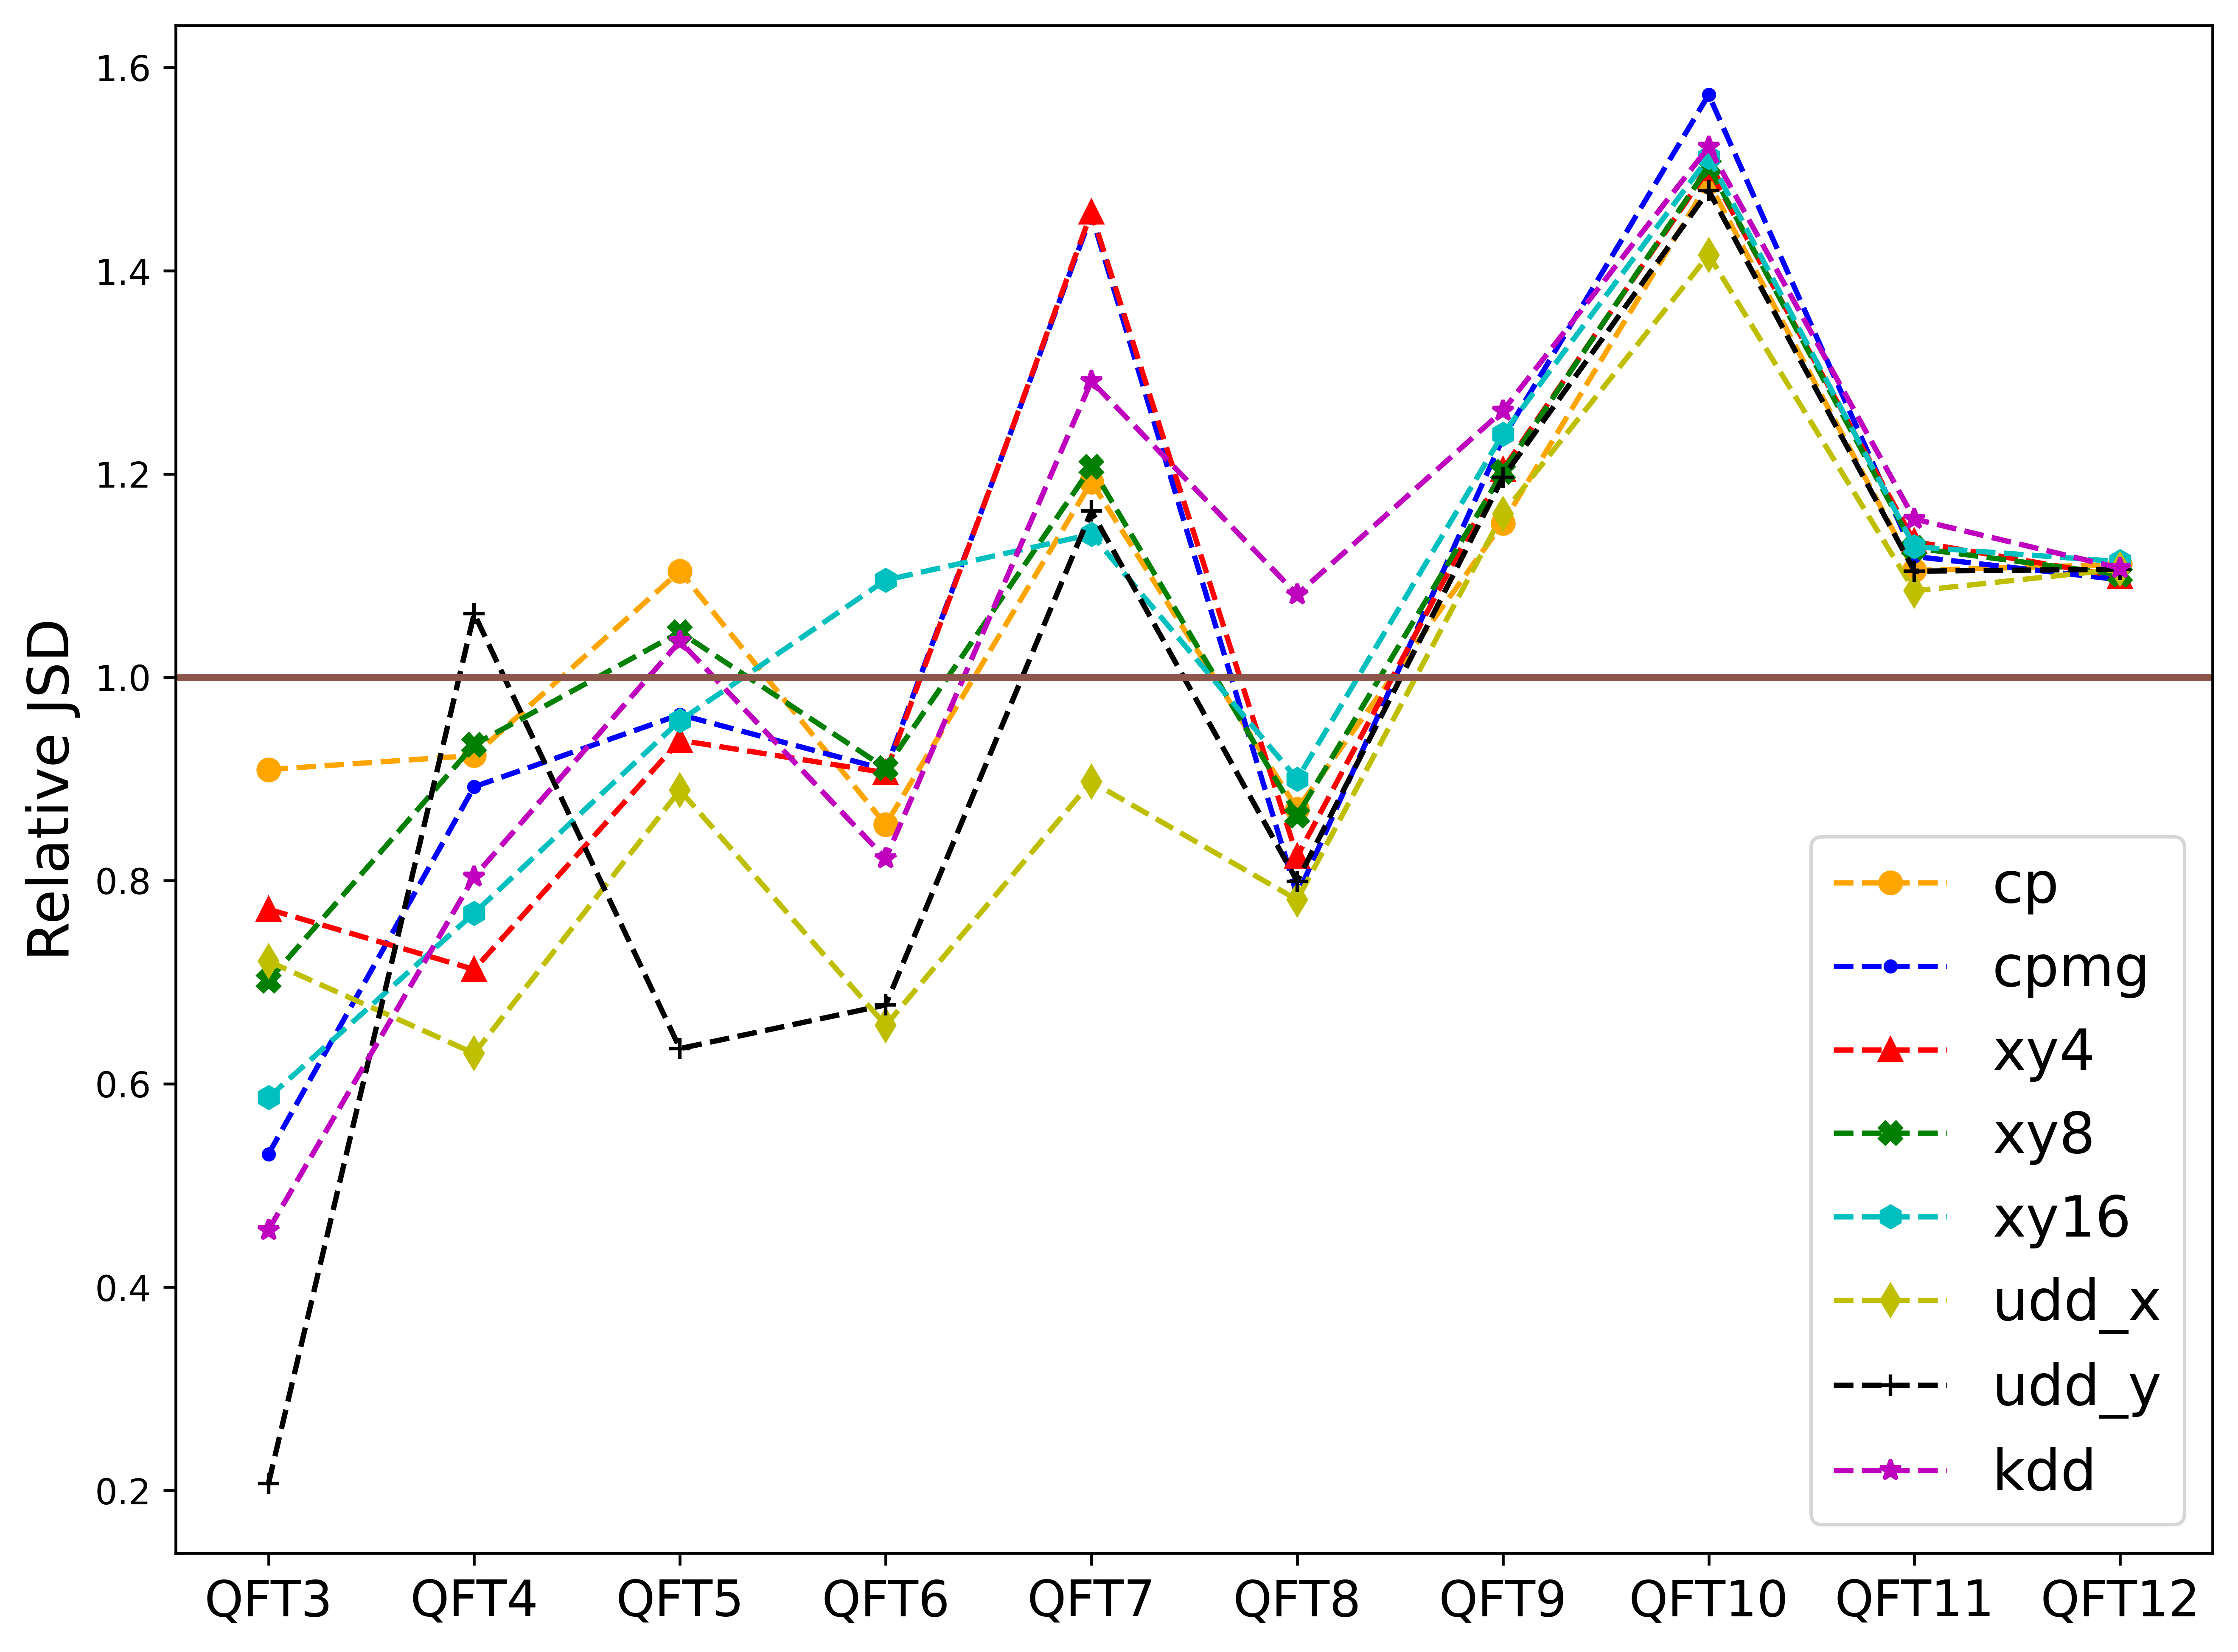

In [22]:
import matplotlib.pyplot as plt
baseline = []

data = []
for name in circuit_names:
    result_data = qft_results_data[name]
    baseline.append(result_data[0])
    ratio = [result_data[0]/i for i in result_data[1:]]
    data.append(ratio)


data = np.array(data)

# hahn_X = data[:, 0]
# hahn_Y = data[:, 1]
cp = data[:, 2]
cpmg = data[:, 3]
xy4 = data[:, 4]
xy8 = data[:, 5]
xy16 = data[:, 6]
udd_X = data[:, 7]
udd_Y = data[:, 8]
kdd = data[:, 9]

x_ticks = circuit_names[:-2]
X = np.arange(len(x_ticks))

from matplotlib.pyplot import figure
fig = figure(num=None, figsize=(8, 6), dpi=600, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])

# plt.plot(X, hahn_Y, linestyle='--', marker='o', color='g', label='hahn_X')
# plt.plot(X, hahn_X, linestyle='--', marker='s', color='m', label='hahn_Y')
plt.plot(X, cp[:-2], linestyle='--', marker='o', color='orange', label='cp')
plt.plot(X, cpmg[:-2], linestyle='--', marker='.', color='b', label='cpmg')
plt.plot(X, xy4[:-2], linestyle='--', marker='^', color='r', label='xy4')
plt.plot(X, xy8[:-2], linestyle='--', marker='X', color='g', label='xy8')
plt.plot(X, xy16[:-2], linestyle='--', marker='h', color='c', label='xy16')
plt.plot(X, udd_X[:-2], linestyle='--', marker='d', color='y', label='udd_x')
plt.plot(X, udd_Y[:-2], linestyle='--', marker='+', color='k', label='udd_y')
plt.plot(X, kdd[:-2], linestyle='--', marker='*', color='m', label='kdd')
plt.axhline(1, color='tab:brown', lw=2)
plt.legend(loc='best', fontsize=16)
# ax.set_title('Relative JSD result for QFT circuit on ibmq_guadalupe', fontsize=18)
ax.set_xticks(X)
ax.set_xticklabels(x_ticks, fontsize=14)
ax.set_ylabel('Relative JSD', fontsize=16)

plt.savefig('TQE_Relat_JSD_QFT_guadalupe_0530.pdf', bbox_inches='tight', pad_inches=0)